<h1>Introduction to Data Science (LTAT.02.002) </h1><br>
<h2>Project: Mobile Price Classification</h2> <br>
<h3>Team: Markkus Koddala, Sander Põldma</h3> <br>
Description:

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 30) 
pd.set_option('display.max_rows', 50)

In [147]:
df = pd.read_csv("train.csv", sep=",")
df_test = pd.read_csv("test.csv", sep=",")

<h1> Step 1. Data understanding </h>

In [148]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [149]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [150]:
df.shape

(2000, 21)

In [151]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [154]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [155]:
for col in df.columns:
  print(col, len(df[col].unique()), df[col].unique())

battery_power 1094 [ 842 1021  563 ... 1139 1467  858]
blue 2 [0 1]
clock_speed 26 [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim 2 [0 1]
fc 20 [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g 2 [0 1]
int_memory 63 [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep 10 [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt 121 [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86


In [156]:
categorical_features=list()
numerical_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<10:
      categorical_features.append(column_name)
    else:
      numerical_features.append(column_name)

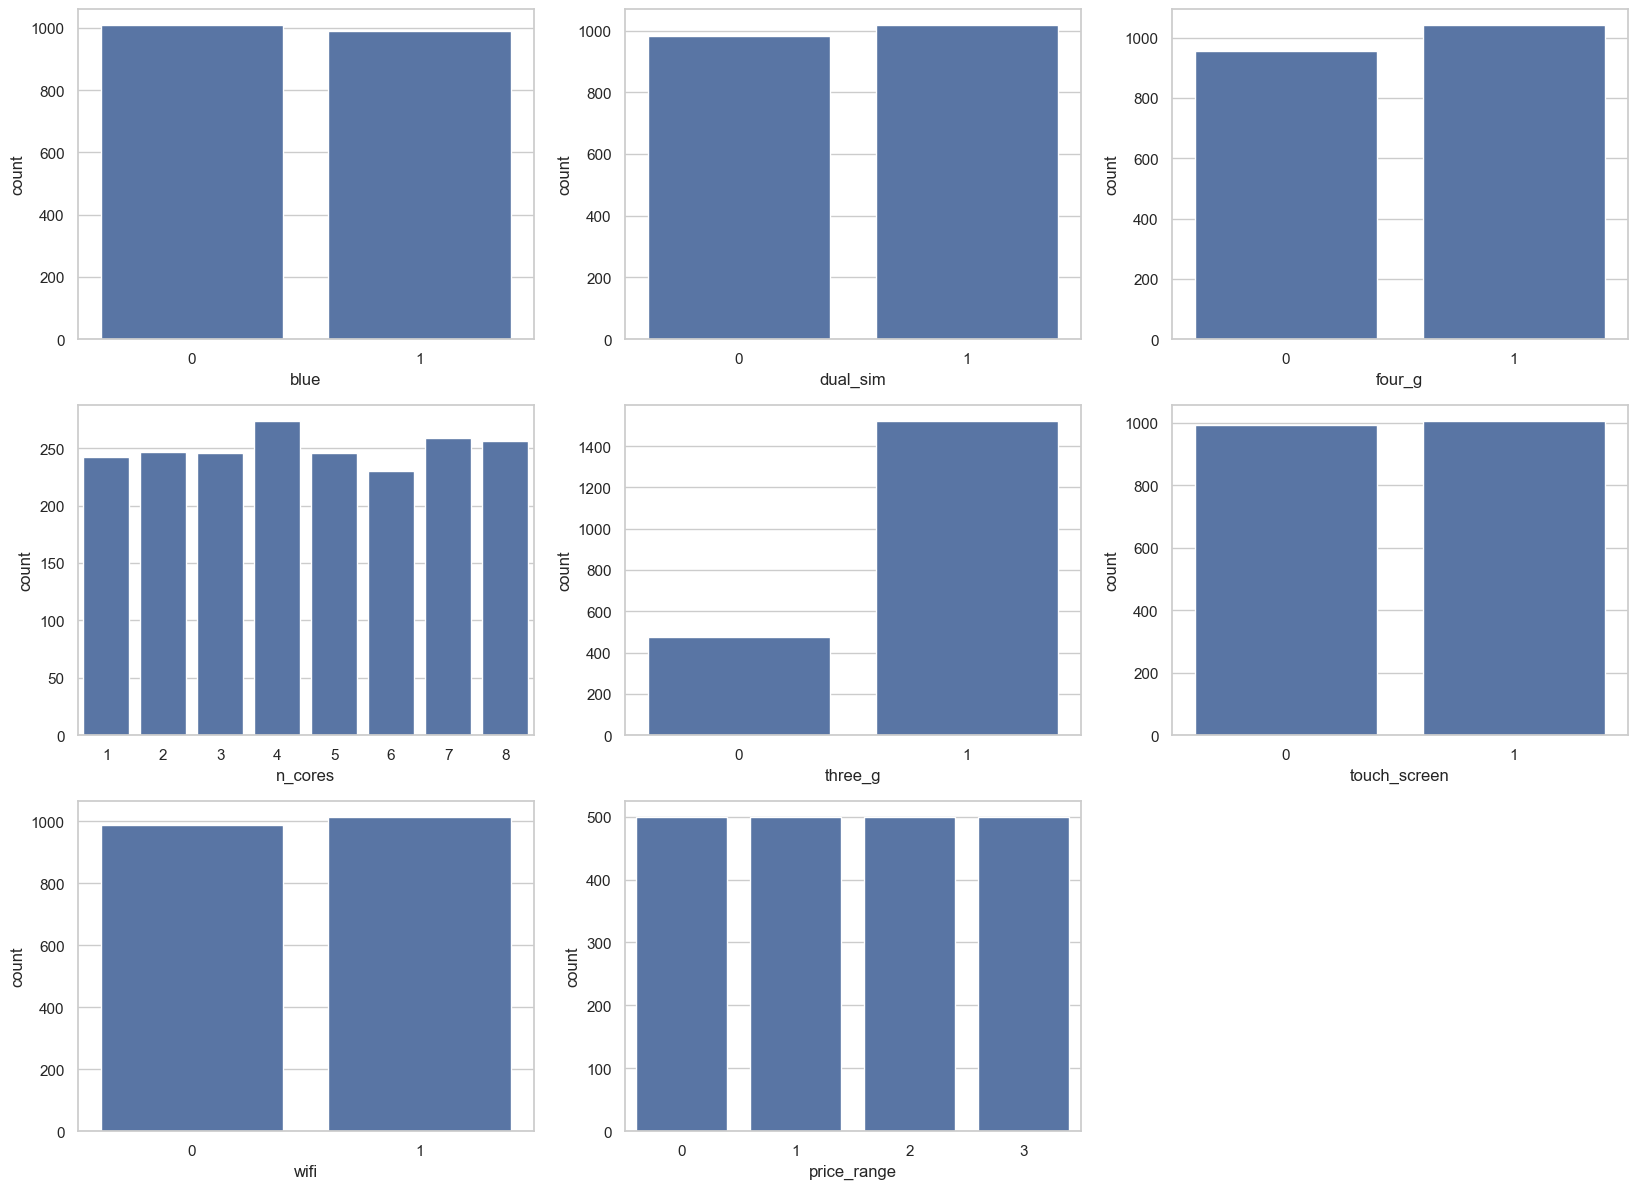

In [157]:
i = 1
plt.figure(figsize = (20,30))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df)
    i +=1

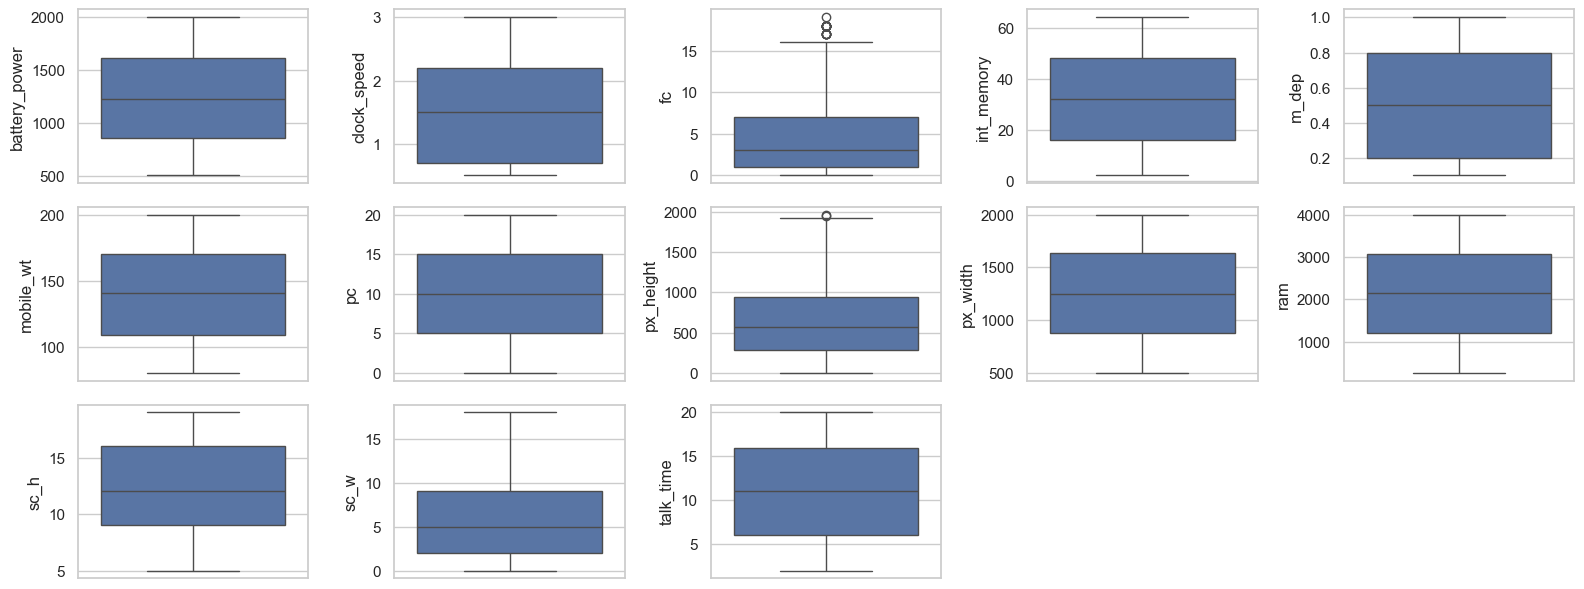

In [158]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
for i, column in enumerate(numerical_features):
    plt.subplot(5, 5, i + 1)  # Adjust subplot layout as needed
    sns.boxplot(y=column, data=df)
    plt.ylabel(column)
    plt.tight_layout()

plt.show()

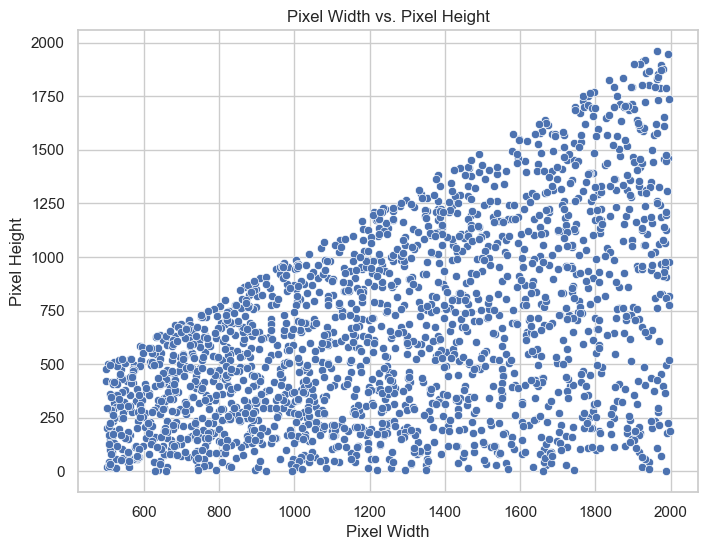

In [159]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='px_width', y='px_height', data=df)

plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.title('Pixel Width vs. Pixel Height')

plt.show()

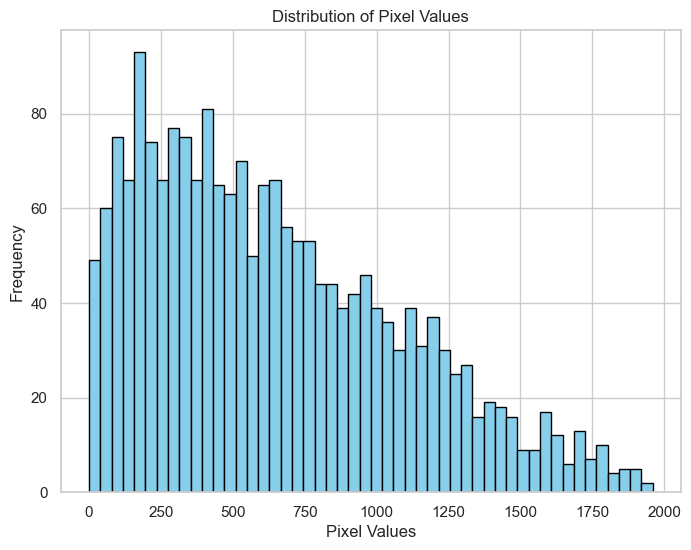

In [160]:
plt.figure(figsize=(8, 6))

plt.hist(df['px_height'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values')

plt.show()

In [161]:
zero_px_height_rows = df[df['px_height'] == 0]
print(zero_px_height_rows)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1481           1834     0          2.1         0   7       1          40   
1933            897     1          2.0         0   3       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1481    0.1         99        4  11          0      1987  3692    13     0   
1933    0.6        154        8  10          0       994  1958     7     5   

      talk_time  three_g  touch_screen  wifi  price_range  
1481         16        1             1     0            3  
1933          7        1             1     0            1  


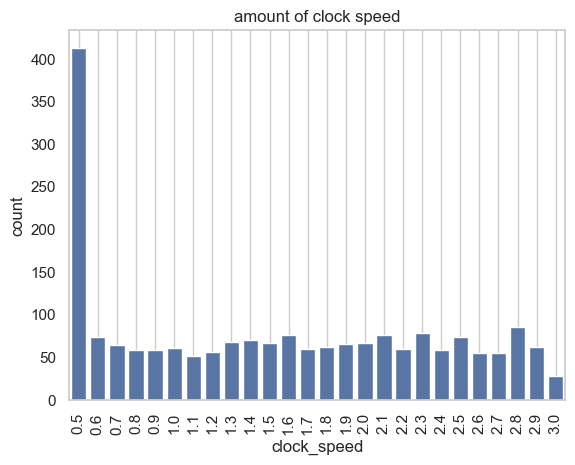

In [162]:
sns.countplot(x=df['clock_speed'])
plt.xticks(rotation=90)
plt.title('amount of clock speed')
plt.grid()

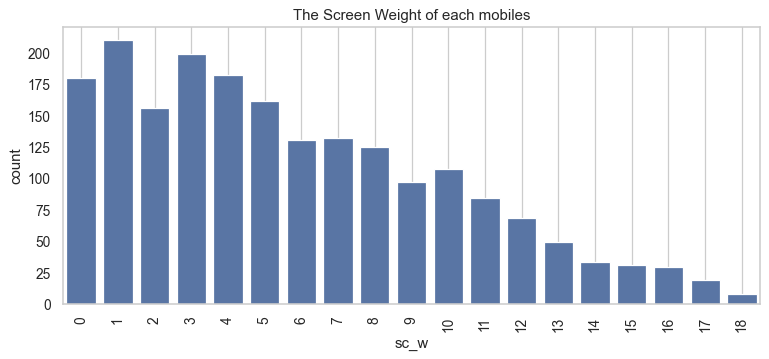

In [163]:
plt.figure(figsize=(10,4),dpi=90)
sns.countplot(x=df['sc_w'])
plt.xticks(rotation=90)
plt.title('The Screen Weight of each mobiles')
plt.grid()

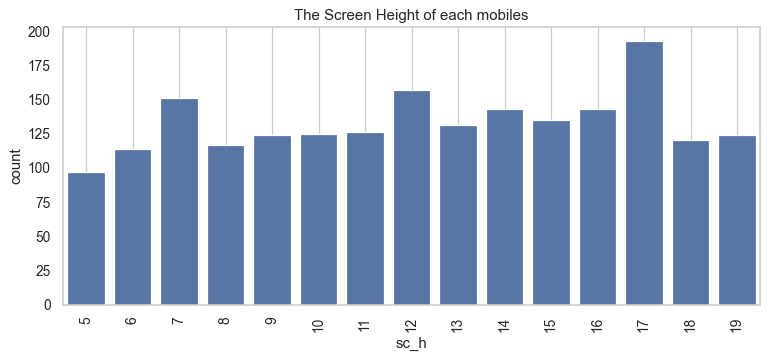

In [164]:
plt.figure(figsize=(10,4),dpi=90)
sns.countplot(x=df['sc_h'])
plt.xticks(rotation=90)
plt.title('The Screen Height of each mobiles')
plt.grid()

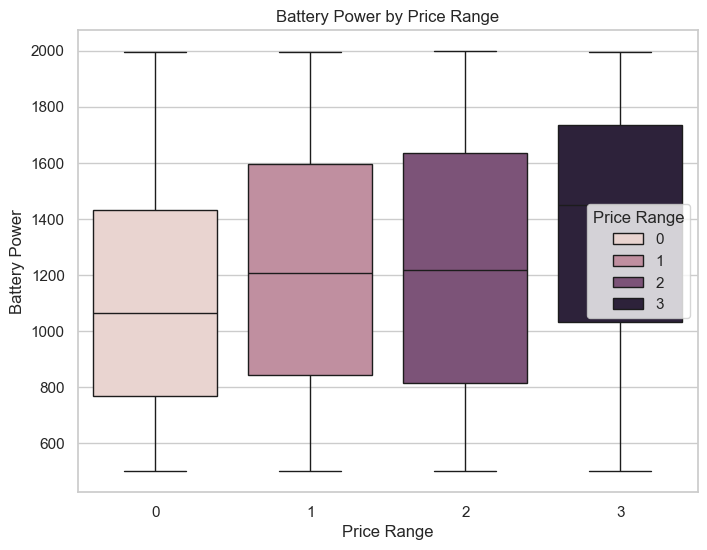

In [165]:
sns.set(style="whitegrid")

# Create the box plot using seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.boxplot(x='price_range', y='battery_power', data=df, hue='price_range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power by Price Range')
plt.legend(title='Price Range')
plt.show()


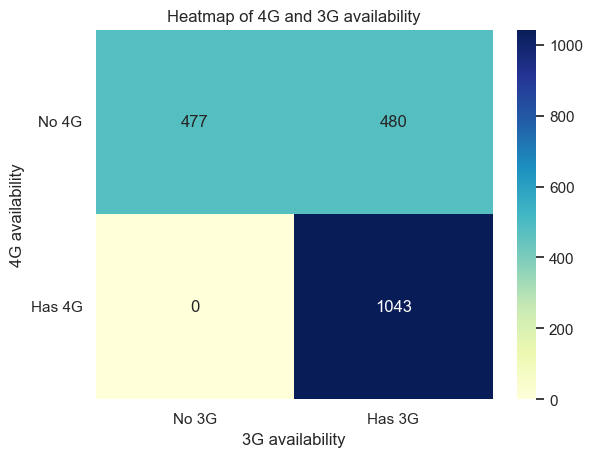

In [166]:
contingency_table = pd.crosstab(df['four_g'], df['three_g'])

sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of 4G and 3G availability')
plt.xlabel('3G availability')
plt.ylabel('4G availability')
plt.xticks([0.5,1.5], ['No 3G', 'Has 3G'])
plt.yticks([0.5,1.5], ['No 4G', 'Has 4G'], rotation=0)
plt.show()


<h1> Step 2. Data preparation

In [167]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [168]:
df.duplicated().sum()

0

In [169]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)


Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []


In [170]:
#Rows where sc_w is 0.
df_sc_w_0=df[df['sc_w']==0]
df_sc_w_0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,17,607,748,1482,18,0,2,1,0,0,1
24,503,0,1.2,1,5,1,8,0.4,111,3,13,201,1245,2583,11,0,12,1,0,0,1
33,1310,1,2.2,1,0,1,51,0.6,100,4,0,178,1919,3845,7,0,12,1,1,0,3
42,1253,1,0.5,1,5,1,5,0.2,152,2,19,685,714,1878,15,0,4,1,1,0,1
50,1547,1,3.0,1,2,1,14,0.7,198,3,19,1042,1832,2059,5,0,15,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,11,317,1805,2782,7,0,17,1,0,0,2
1920,591,1,0.5,1,1,1,16,0.9,90,6,17,892,1603,3746,5,0,5,1,1,0,3
1946,590,1,1.2,1,0,0,32,0.4,141,6,1,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,1,64,745,1503,10,0,13,0,0,0,0


In [171]:
df_px_h_0=df[df['px_height']==0]
df_px_h_0

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,5,7,1,1,0,1


In [172]:
df=df.drop(df[df['sc_w']==0].index)
df=df.drop(df[df['px_height']==0].index)

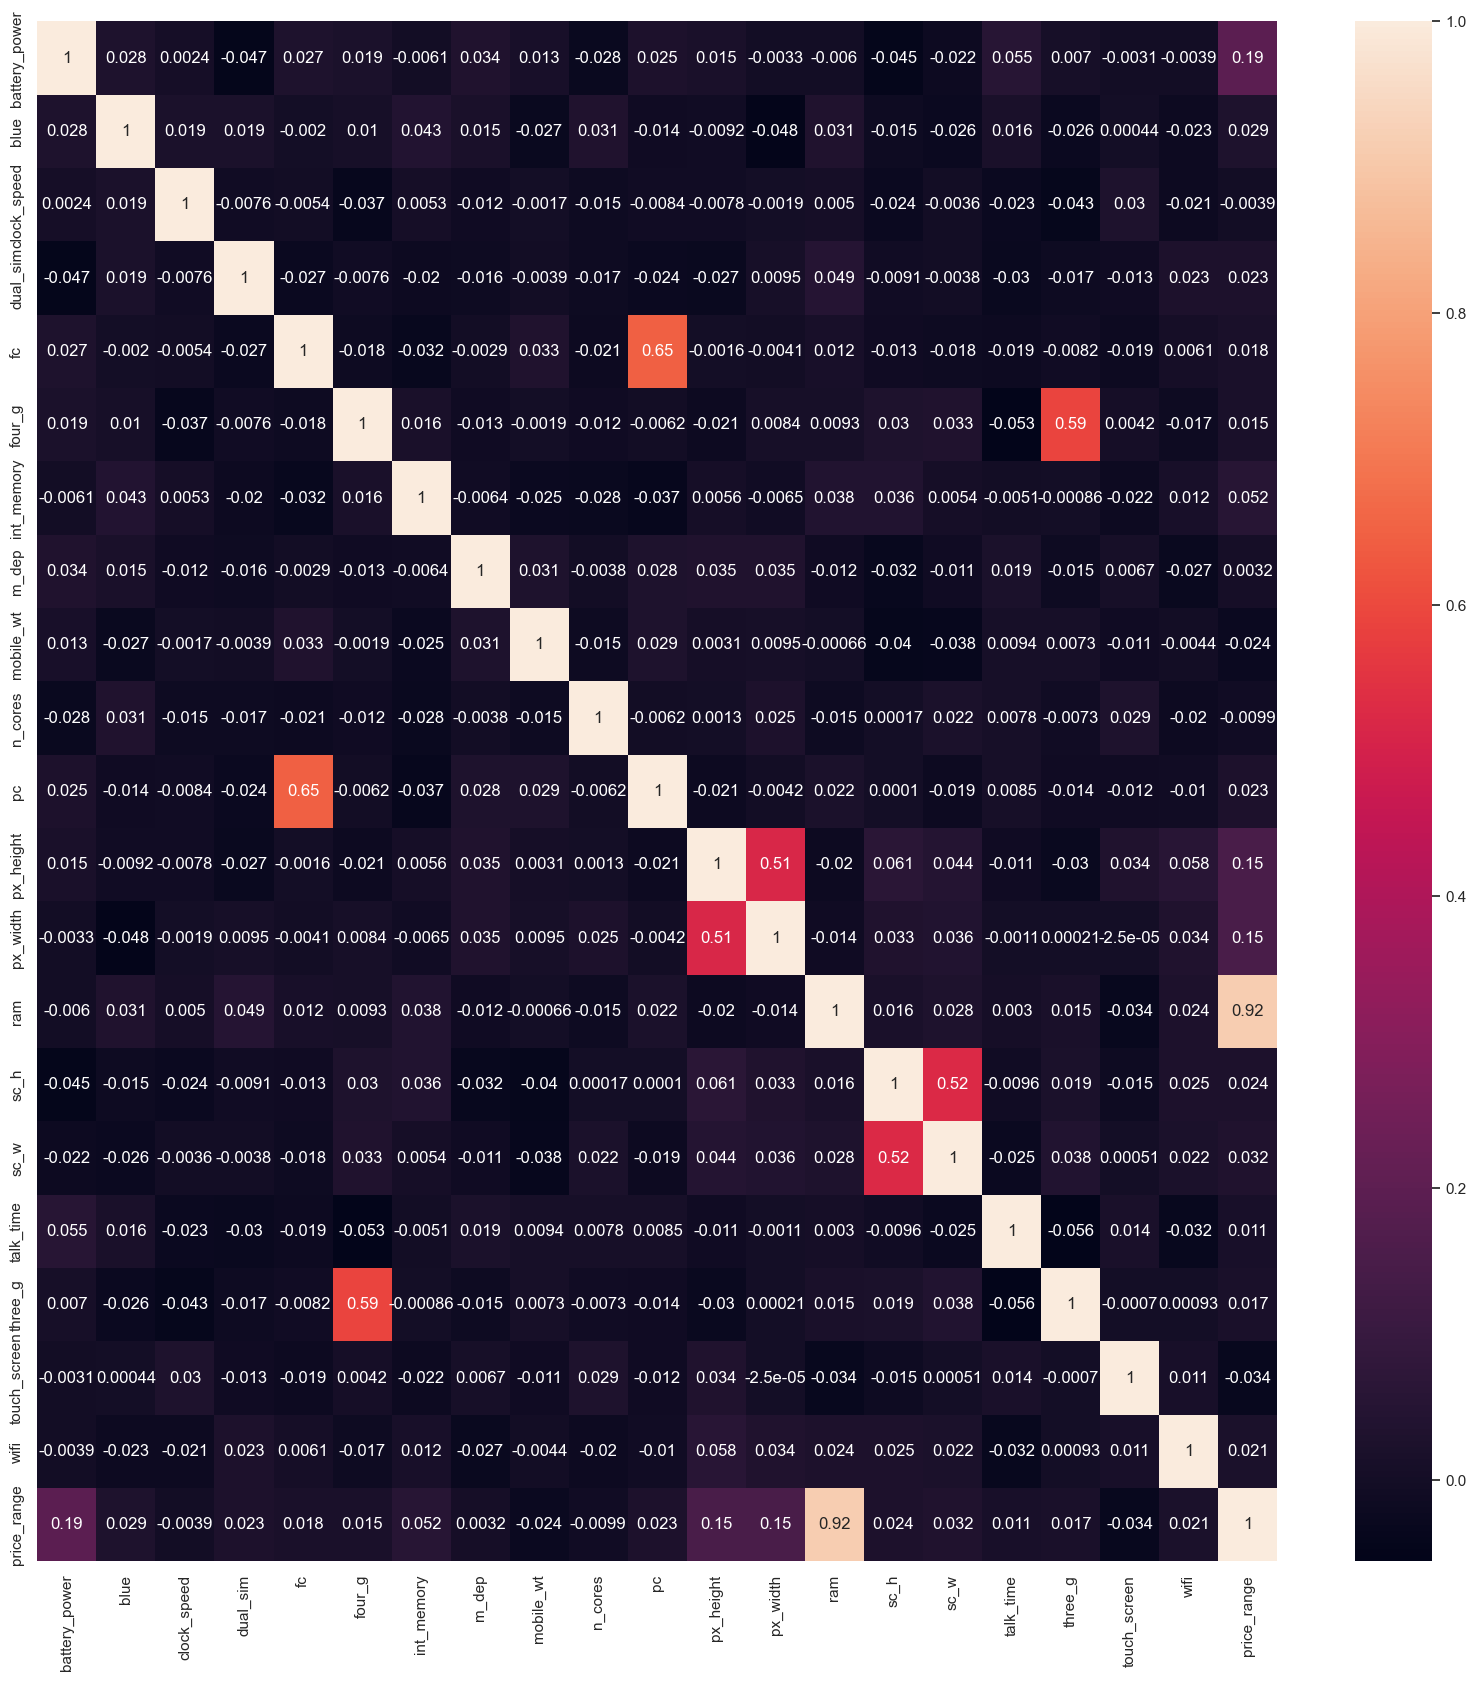

In [173]:
corr = df.corr()


# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [174]:
##ekraani laiuse ja kõrguse asemel arvutada diagonaal

#kas four g telodel kõikidel on 3g?

#EDA ANALÜÜS

In [175]:
def network_type(row):
    if row['four_g'] == 1:
        return 2
    elif row['three_g'] == 1:
        return 1
    else:
        return 0

df['network_type'] = df.apply(network_type, axis=1)


In [176]:
def height_width_to_diagonal(height, width):
  return math.sqrt(height**2 + width**2)

diagonals = []

for index, row in df.iterrows():
  diagonal = round(height_width_to_diagonal(row["sc_h"], row["sc_w"]),1)
  diagonals.append(diagonal)

df['diagonals'] = diagonals


In [177]:
#df['pixel_area'] = df['px_height'] * df['px_width']


In [178]:
df_train_Y = df["price_range"]   
df_train_X = df.drop('price_range', axis=1)


In [179]:
df_train_X = df_train_X.drop(['sc_h', 'sc_w', 'four_g','three_g', 'sc_h', 'sc_w'], axis = 1)
df_train_X

,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,touch_screen,wifi,network_type,diagonals
0,842,0,2.2,0,1,7,0.6,188,2,2,20,756,2549,19,0,1,0,11.4
1,1021,1,0.5,1,0,53,0.7,136,3,6,905,1988,2631,7,1,0,2,17.3
2,563,1,0.5,1,2,41,0.9,145,5,6,1263,1716,2603,9,1,0,2,11.2
3,615,1,2.5,0,0,10,0.8,131,6,9,1216,1786,2769,11,0,0,1,17.9
4,1821,1,1.2,0,13,44,0.6,141,2,14,1208,1212,1411,15,1,0,2,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,2,0.8,106,6,14,1222,1890,668,19,1,0,2,13.6
1996,1965,1,2.6,1,0,39,0.2,187,4,3,915,1965,2032,16,1,1,1,14.9
1997,1911,0,0.9,1,1,36,0.7,108,8,3,868,1632,3057,5,1,0,2,9.1
1998,1512,0,0.9,0,4,46,0.1,145,5,5,336,670,869,19,1,1,2,20.6


<h1> 4. Model Training</h1>

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression



In [202]:
def plot_confusion_matrix_with_report(y_true, y_pred):
    class_labels = ['0 (low cost)', '1 (medium cost)', '2 (high cost)', '3 (very high cost)']
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy:', accuracy)
    
    class_report = classification_report(y_true, y_pred)
    print("\nClassification Report:")
    print(class_report)

    mean_error = mean_squared_error(y_true, y_pred)
    print('Mean Squared Error:', mean_error)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_Y, test_size=0.20, random_state=42)

      battery_power  blue  clock_speed  dual_sim  fc  int_memory  m_dep  \
323            1379     1          2.1         1  14          63    1.0   
1315           1510     0          0.6         1   1          32    0.7   
1699           1002     1          1.8         0   1          45    0.7   
334            1882     1          1.3         1   8          47    0.2   
1880           1720     0          1.6         0  18           2    0.8   
...             ...   ...          ...       ...  ..         ...    ...   
1239           1240     0          1.6         0   0          39    0.1   
1418            908     0          2.1         0   1          44    0.6   
942            1061     1          2.1         0   3          52    0.1   
1603            984     1          2.2         1   0          39    0.5   
1235           1971     1          0.5         1   0          40    0.3   

      mobile_wt  n_cores  pc  px_height  px_width   ram  talk_time  \
323          83        1  17 

In [183]:
scaler=MinMaxScaler(feature_range=(0,1))
X_train_MinMaxScaled=scaler.fit_transform(X_train)
X_test_MinMaxScaled=scaler.fit_transform(X_test)

<h4>RandomForestClassifier</h4>

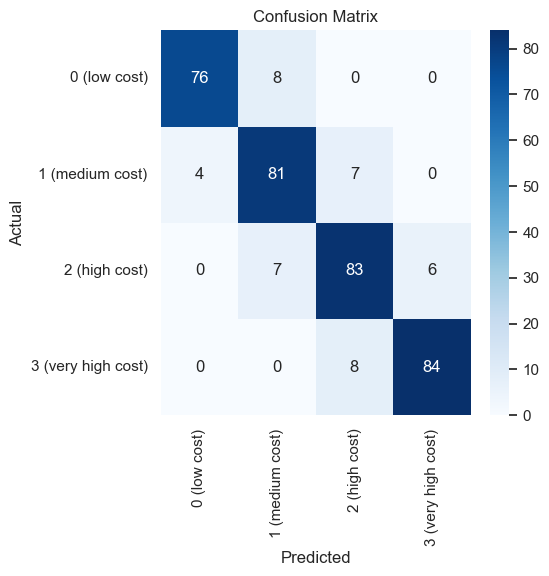

Accuracy: 0.8901098901098901

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        84
           1       0.84      0.88      0.86        92
           2       0.85      0.86      0.86        96
           3       0.93      0.91      0.92        92

    accuracy                           0.89       364
   macro avg       0.89      0.89      0.89       364
weighted avg       0.89      0.89      0.89       364



In [184]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
plot_confusion_matrix_with_report(y_pred, y_test)


<h4>DecisionTreeClassifier</h4>

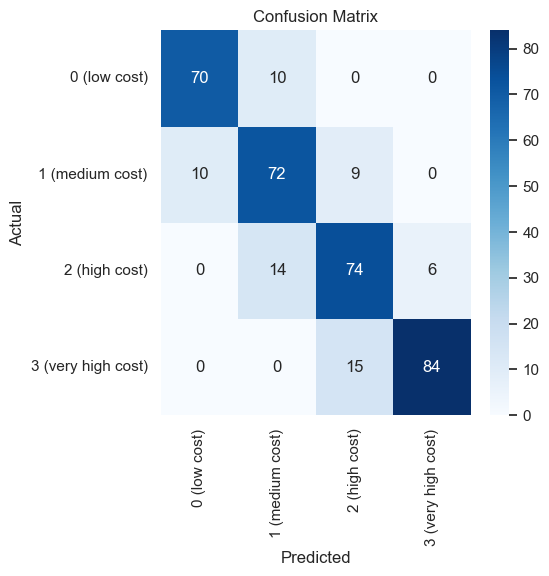

Accuracy: 0.8241758241758241

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        80
           1       0.75      0.79      0.77        91
           2       0.76      0.79      0.77        94
           3       0.93      0.85      0.89        99

    accuracy                           0.82       364
   macro avg       0.83      0.83      0.83       364
weighted avg       0.83      0.82      0.83       364



In [185]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

plot_confusion_matrix_with_report(y_pred, y_test)


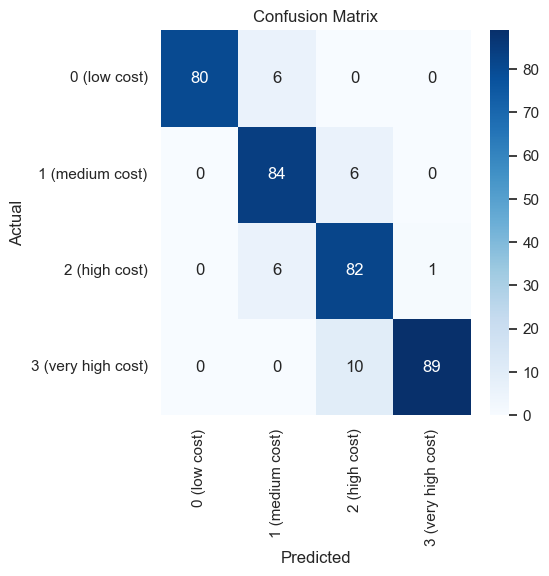

Accuracy: 0.9203296703296703

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        86
           1       0.88      0.93      0.90        90
           2       0.84      0.92      0.88        89
           3       0.99      0.90      0.94        99

    accuracy                           0.92       364
   macro avg       0.93      0.92      0.92       364
weighted avg       0.93      0.92      0.92       364



In [186]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_MinMaxScaled, y_train)

y_pred = logistic_regression.predict(X_test_MinMaxScaled)

plot_confusion_matrix_with_report(y_pred, y_test)


___________________________________________________________________________________________________________________________________________________________________________________________________

<h3>StandardScaler </h3>

In [187]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h4>K-Nearest Neighbors (KNN) </h4>

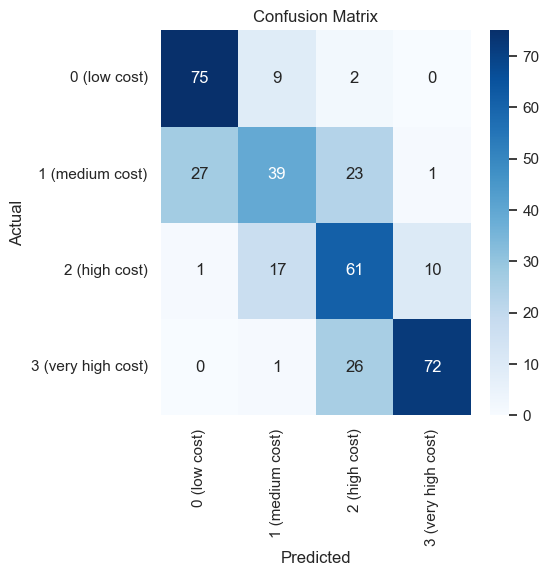

Accuracy: 0.6785714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        86
           1       0.59      0.43      0.50        90
           2       0.54      0.69      0.61        89
           3       0.87      0.73      0.79        99

    accuracy                           0.68       364
   macro avg       0.68      0.68      0.67       364
weighted avg       0.69      0.68      0.67       364



In [139]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_scaled, y_train)

y_test = knn.predict(X_test_scaled) 

plot_confusion_matrix_with_report(y_pred, y_test)


<h4> Neural Network </h4>

Epoch 1/40
41/41 [==============================] - 1s 7ms/step - loss: 1.1954 - accuracy: 0.4805 - val_loss: 0.9899 - val_accuracy: 0.5959
Epoch 2/40
41/41 [==============================] - 0s 4ms/step - loss: 0.8015 - accuracy: 0.7227 - val_loss: 0.6876 - val_accuracy: 0.7260
Epoch 3/40
41/41 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.8426 - val_loss: 0.5143 - val_accuracy: 0.8630
Epoch 4/40
41/41 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.9114 - val_loss: 0.3945 - val_accuracy: 0.8904
Epoch 5/40
41/41 [==============================] - 0s 4ms/step - loss: 0.3085 - accuracy: 0.9366 - val_loss: 0.3261 - val_accuracy: 0.9247
Epoch 6/40
41/41 [==============================] - 0s 5ms/step - loss: 0.2437 - accuracy: 0.9496 - val_loss: 0.2873 - val_accuracy: 0.9110
Epoch 7/40
41/41 [==============================] - 0s 4ms/step - loss: 0.1978 - accuracy: 0.9572 - val_loss: 0.2579 - val_accuracy: 0.9315
Epoch 8/40
41/41 [==

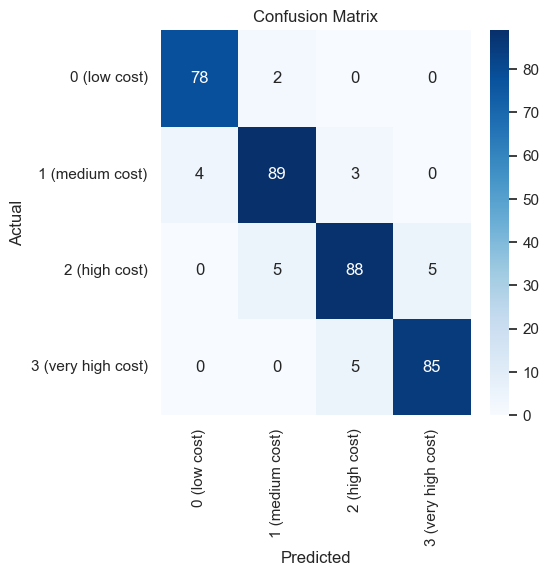

Accuracy: 0.9340659340659341

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        80
           1       0.93      0.93      0.93        96
           2       0.92      0.90      0.91        98
           3       0.94      0.94      0.94        90

    accuracy                           0.93       364
   macro avg       0.93      0.94      0.94       364
weighted avg       0.93      0.93      0.93       364



In [189]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer with 4 units for 4 classes and softmax activation
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])


model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.1)


y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

plot_confusion_matrix_with_report(y_test, y_pred)


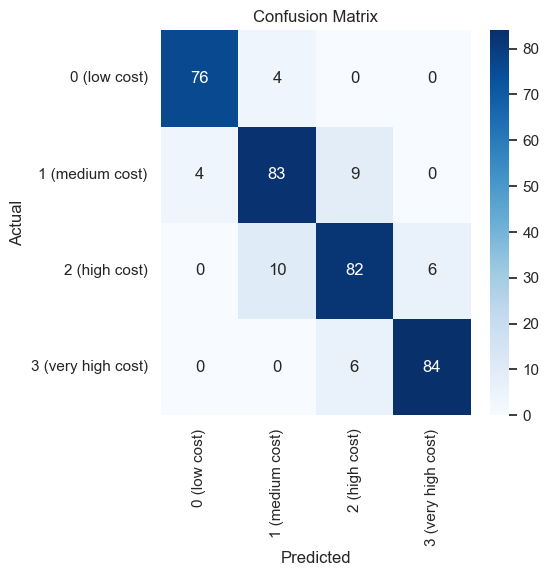

Accuracy: 0.8928571428571429

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        80
           1       0.86      0.86      0.86        96
           2       0.85      0.84      0.84        98
           3       0.93      0.93      0.93        90

    accuracy                           0.89       364
   macro avg       0.90      0.90      0.90       364
weighted avg       0.89      0.89      0.89       364

Mean Squared Error: 0.10714285714285714


In [203]:
svc = SVC(kernel='rbf', C=1.0, gamma='scale') 

svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

plot_confusion_matrix_with_report(y_test, y_pred)


___________________________________________________________________________________________________________________________________________________________________________________________________

<h1> Hyperparametering</h1>

In [ ]:
from sklearn.model_selection import GridSearchCV

<h4>KNeighborsClassifier</h4>

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 50, 100, 200, 400],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'euclidean'],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30, 50, 70, 100]
}

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
Best Score: 0.9333333333333332
Test Set Accuracy: 0.9093406593406593


<strong>KNN best params:</strong> {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'distance'}
    
<strong>KNN best score:</strong> 0.93333

<strong>KNN best accuracy:</strong> 0.90934

<h4>RandomForestClassifier</h4>

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2,5,10,15,20],
    'min_samples_leaf': [1,5,10,15,20],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8824742268041238
Test Set Accuracy: 0.8873626373626373


<strong>Random forest best params:</strong> {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

<strong>Random forest best score:</strong> 0.88247

<strong>Random forest best accuracy:</strong> 0.88736

<h4>DecisionTreeClassifier</h4>

In [ ]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [3, 6, 12],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters (DecisionTree):", best_params_dt)
print("Best Score (DecisionTree):", best_score_dt)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters (DecisionTree): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}
Best Score (DecisionTree): 0.8604810996563576
Test Set Accuracy: 0.8873626373626373


<strong>Decision tree best params:</strong> {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3, 'splitter': 'best'}

<strong>Decision tree best score:</strong> 0.86048

<strong>Decision tree best accuracy:</strong> 0.88736

<h4>Support Vector Machine</h4>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_Y, test_size=0.2, random_state=42)

param_grid_svm = {
    'C': np.arange(1, 100, 10),
    'gamma': [0.1, 1, 'auto', 'scale'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}


svc_classificer = SVC()

grid_search_svm = GridSearchCV(svc_classificer, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters (SVM):", best_params_svm)
print("Best Score (SVM):", best_score_svm)

Best Parameters (SVM): {'C': 11, 'gamma': 0.1, 'kernel': 'linear'}
Best Score (SVM): 0.9690721649484535


<strong>SVM best params:</strong> {'C': 11, 'gamma': 0.1, 'kernel': 'linear'}

<strong>SVM best score:</strong> 0.96907

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_svm = {
    'C': np.arange(1, 100, 10),
    'gamma': [0.1, 1, 'auto', 'scale'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}


svc_classificer = SVC()

grid_search_svm = GridSearchCV(svc_classificer, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_svm.fit(X_train_scaled, y_train)

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters (SVM):", best_params_svm)
print("Best Score (SVM):", best_score_svm)

Best Parameters (SVM): {'C': 31, 'gamma': 0.1, 'kernel': 'linear'}
Best Score (SVM): 0.9690721649484535


<strong>SVM(scaled) best params:</strong> {'C': 11, 'gamma': 0.1, 'kernel': 'linear'}

<strong>SVM(scaled) best score:</strong> 0.96907

<h4>Compare</h4>

In [ ]:
mse_compare = pd.DataFrame(columns=['model', 'MSE', 'acc'])

In [ ]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, metric= 'minkowski', n_neighbors= 10, weights= 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
mse_compare = pd.concat([mse_compare, pd.DataFrame([{'model': "KNN", 'MSE': mse, 'acc': acc}])], ignore_index=True)
print('MSE:', mse)

MSE: 0.09065934065934066


In [ ]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
mse_compare = pd.concat([mse_compare, pd.DataFrame([{'model': "RandomForest", 'MSE': mse, 'acc': acc}])], ignore_index=True)
print('MSE:', mse)

MSE: 0.12362637362637363


In [ ]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf=5, min_samples_split= 3, splitter= 'best')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
mse_compare = pd.concat([mse_compare, pd.DataFrame([{'model': "DecisionTree", 'MSE': mse, 'acc': acc}])], ignore_index=True)
print('MSE:', mse)

MSE: 0.1510989010989011


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc = SVC(C= 11, gamma= 0.1, kernel= 'linear')
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
mse_compare = pd.concat([mse_compare, pd.DataFrame([{'model': "SVM", 'MSE': mse, 'acc': acc}])], ignore_index=True)
print('MSE:', mse)

MSE: 0.03296703296703297


In [ ]:
mse_compare

,model,MSE,acc
0,KNN,0.090659,0.909341
1,RandomForest,0.123626,0.876374
2,DecisionTree,0.151099,0.848901
3,SVM,0.032967,0.967033
4,Ridge,0.102876,
5,Lasso,0.105079,
